In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project

Data Source: https://www.kaggle.com/saife245/english-premier-league
<br>Github: https://github.com/mikylab/DSCI235

### Project Description

The game of football, otherwise known as soccer, is a game played throughout the world. The English Premier League is one of the best and most competitive club football leagues in the world. It attracts players and fans from all over the world. The dataset I have selected is complete data collected from teams in the Premier League from the 2000-2001 season to the 2017-2018 season. This data has 6,840 games recorded over the total span of the data collected. The Premier League also has a relegation and promotion system, which means there are rows that have data omitted for certain years as new teams are relegated and promoted. This provides an added challenge when working with this dataset.

The dataset contains the results of each fixture (game) played, but not the league table that results from the games or the total sum of the features. Consquently, I intend to answer the following questions:

------
1. Is there a home field advantage?
    - How does the average goals scored at home per season compare to the average number of goals scored away?
    - Is there a difference in the number of home wins and away wins in each season?
2. Can the league table for each season be created based on the results in the raw dataset?
3. Which team accumulated the most points over the seasons? 
4. Does the cutoff for being in the top four and bottom four change each year? 



*Note: The abbreviations used in the dataset are:*
<br> Div = League Division

Date = Match Date (dd/mm/yy)
HomeTeam = Home Team 
Away team = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full-Time Away Team Goals
FTR = Full-Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Attendance = Crowd Attendance
Referee = Match Referee

HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork

HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed

HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards


In [2]:
path = '/Users/mikylabowen/OneDrive - Colostate/Spring_21/DSCI_235/premier_league_data/datasets/'
years= ['2000-01','2001-02','2002-03', '2003-04', '2004-05','2005-06', '2006-07', '2007-08', '2008-09','2009-10',
        '2010-11', '2011-12','2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19','2019-20']
raw_2000 = pd.read_csv(path + years[0] +'.csv')
raw_2000['Season'] = years[0]
raw_2001 = pd.read_csv(path + years[1] +'.csv')
raw_2001['Season'] = years[1]
raw_2002 = pd.read_csv(path + years[2] +'.csv')
raw_2002['Season'] = years[2]
raw_2003 = pd.read_csv(path + years[3] +'.csv')
raw_2003['Season'] = years[3]
raw_2004 = pd.read_csv(path + years[4] +'.csv')
raw_2004['Season'] = years[4]
raw_2005 = pd.read_csv(path + years[5] +'.csv')
raw_2005['Season'] = years[5]
raw_2006 = pd.read_csv(path + years[6] +'.csv')
raw_2006['Season'] = years[6]
raw_2007 = pd.read_csv(path + years[7] +'.csv')
raw_2007['Season'] = years[7]
raw_2008 = pd.read_csv(path + years[8] +'.csv')
raw_2008['Season'] = years[8]
raw_2009 = pd.read_csv(path + years[9] +'.csv')
raw_2009['Season'] = years[9]
raw_2010 = pd.read_csv(path + years[10] +'.csv')
raw_2010['Season'] = years[10]
raw_2011 = pd.read_csv(path + years[11] +'.csv')
raw_2011['Season'] = years[11]
raw_2012 = pd.read_csv(path + years[12] +'.csv')
raw_2012['Season'] = years[12]
raw_2013 = pd.read_csv(path + years[13] +'.csv')
raw_2013['Season'] = years[13]
raw_2014 = pd.read_csv(path + years[14] +'.csv')
raw_2014['Season'] = years[14]
raw_2015 = pd.read_csv(path + years[15] +'.csv')
raw_2015['Season'] = years[15]
raw_2016 = pd.read_csv(path + years[16] +'.csv')
raw_2016['Season'] = years[16]
raw_2017 = pd.read_csv(path + years[17] +'.csv')
raw_2017['Season'] = years[17]
raw_2018 = pd.read_csv(path + years[18] +'.csv')
raw_2018['Season'] = years[18]
raw_2019 = pd.read_csv(path + years[19] +'.csv')
raw_2019['Season'] = years[19]

*Note: The raw data included full data for each season up until to the 2017-2018 season. The raw data for 2018-2019 and 2019-2020 was incomplete. It only included data for half of the season. Therefore, since all of rest of the data was complete, I ommitted raw_2018 and raw_2019 from the data analysis.*

In [23]:
# raw_2018, raw_2019
seasons_data = pd.concat([raw_2000, raw_2001, raw_2002, raw_2003, raw_2004, raw_2005, raw_2006, raw_2007, raw_2008, raw_2009, raw_2010, raw_2011,
               raw_2012,raw_2013,raw_2014,raw_2015, raw_2016, raw_2017], join= 'outer', axis =0)
seasons_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Note: The raw data included additional columns that were for sports betting. Not every season's data included these columns and since they were not relavant to the results of a game, I ommitted these columns and only kept columns that related to the game itself.*

In [4]:
total_columns =seasons_data.columns
print(list(total_columns))
selected_columns =['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', 'Season']
len(selected_columns)

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', 'Season', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA']


29

*Note: Since each game had a listed date, I used pandas data time index functionality to add the year each game was played since the season column was a span of years.*

In [5]:
seasons_data = seasons_data.iloc[:,0:29]
seasons_data['Year']= pd.DatetimeIndex(seasons_data['Date']).year
seasons_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HO,AO,HY,AY,HR,AR,Season,Year
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,13,12,8.0,6.0,1,2,0,0,2000-01,2000
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,19,14,2.0,3.0,1,2,0,0,2000-01,2000
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,15,21,1.0,3.0,5,3,1,0,2000-01,2000
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,11,13,0.0,2.0,1,1,0,0,2000-01,2000
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,21,20,6.0,1.0,1,3,0,0,2000-01,2000


In [6]:
np.sort(seasons_data['HomeTeam'].unique() ) == np.sort(seasons_data['AwayTeam'].unique()) #Verify that the home team list == the away team list
teams = np.sort(seasons_data['HomeTeam'].unique() ) #Sort the teams alphabetically. 

*Note: The data provided gave the amount of goals scored in the first half and the total amount of goals scored per game. To get the amount of goals scored in the 2nd half of the game I created a new column for the 2nd half goals scored. This was abbreviated as 2HHG for 2nd Half Home Goals and 2HAG for 2nd Half Away Goals.*

In [7]:
seasons_data['2HHG']= seasons_data['FTHG']-seasons_data['HTHG']
seasons_data['2HAG']= seasons_data['FTAG']-seasons_data['HTAG']
seasons_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HO,AO,HY,AY,HR,AR,Season,Year,2HHG,2HAG
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,8.0,6.0,1,2,0,0,2000-01,2000,2,0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,2.0,3.0,1,2,0,0,2000-01,2000,3,2
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,1.0,3.0,5,3,1,0,2000-01,2000,0,2
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,0.0,2.0,1,1,0,0,2000-01,2000,1,0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,6.0,1.0,1,3,0,0,2000-01,2000,0,0


## Part 1: Is there a home field advantage?
### 1A) How does the average goals scored at home per season compared to the average number of goals scored away? 

In order to examine, if there was a home match advantage I looked at the number of home goals scored and compared it to the number of away goals scored. To answer this question, I only looked at the FTHG, HHTG, 2HHG, FTAG, HTAG, and 2HAG columns.These columns were the Full Time Home Goals, Half Time Home Goals, 2nd Half Home Goals, Full Time Away Goals, Half Time Away Goals, and 2nd Half Away Goals. 
<br> <br> I then grouped by season, took the mean of each column listed above, and plotted the results. 

#### Plot of the average home goals  and average away goals scored per season

<AxesSubplot:title={'center':'Average Away Scored per Season'}, xlabel='Season'>

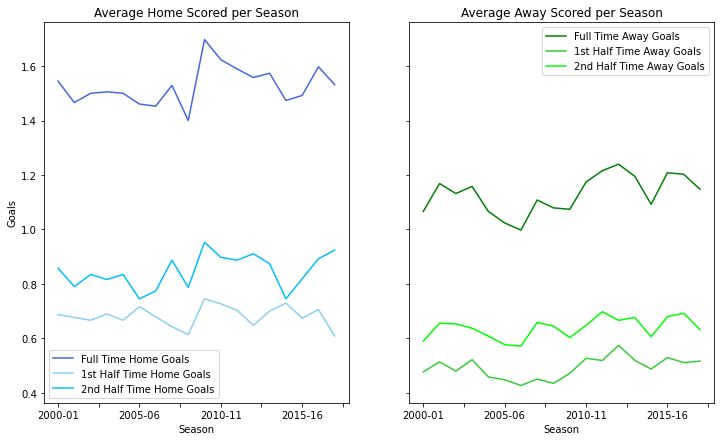

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
seasons_data.groupby('Season')['FTHG'].mean().plot(ax = ax1, color ='royalblue',figsize = (12,7), legend = True, label='Full Time Home Goals',ylabel= "Goals", title='Average Home Scored per Season')
seasons_data.groupby('Season')['HTHG'].mean().plot(ax = ax1, color ='lightskyblue',legend = True, label='1st Half Time Home Goals')
seasons_data.groupby('Season')['2HHG'].mean().plot(ax = ax1, color ='deepskyblue',legend = True, label='2nd Half Time Home Goals')


seasons_data.groupby('Season')['FTAG'].mean().plot(ax = ax2, color = 'green', legend = True, label='Full Time Away Goals', title='Average Away Scored per Season' )
seasons_data.groupby('Season')['HTAG'].mean().plot(ax = ax2, color = 'limegreen', legend = True, label='1st Half Time Away Goals')
seasons_data.groupby('Season')['2HAG'].mean().plot(ax = ax2, color = 'lime', legend = True, label='2nd Half Time Away Goals')


### Results: 
#### How does the average goals scored at home per season compared to the average number of goals scored away?

- **There appears to be a difference in the amount of goals scored at home compared to goals scored away.** After graphing the amount of goals scored on two plots, it can be observed that the average home goals hovers at slightly higher values than the average away goals.
- **The average number of goals scored in each half appears to be slightly higher in the second half than in the first half.** The middle line in the graph which corresonds to 2nd half goals has a higher value for both the away and home teams.  

### 1B) Is there a difference in the amount of home wins and away wins in each season?



In [9]:
results_per_season = seasons_data.groupby('Season')['FTR'].value_counts().to_frame()
results_per_season =results_per_season.rename(columns={"FTR": "SumResults"})
results_per_season.reset_index(inplace = True)
results_per_season.head()

total_results = results_per_season.groupby('FTR').sum()
total_results['Result Rate']  =  total_results.loc[:]/total_results.sum() * 100
total_results.reset_index(inplace = True)
total_results

,FTR,SumResults,Result Rate
0,A,1913,27.967836
1,D,1751,25.599415
2,H,3176,46.432749


#### Plot of the number of home wins, away wins and draws each season

<AxesSubplot:title={'center':'Results by Season'}, xlabel='Season', ylabel='Total Count'>

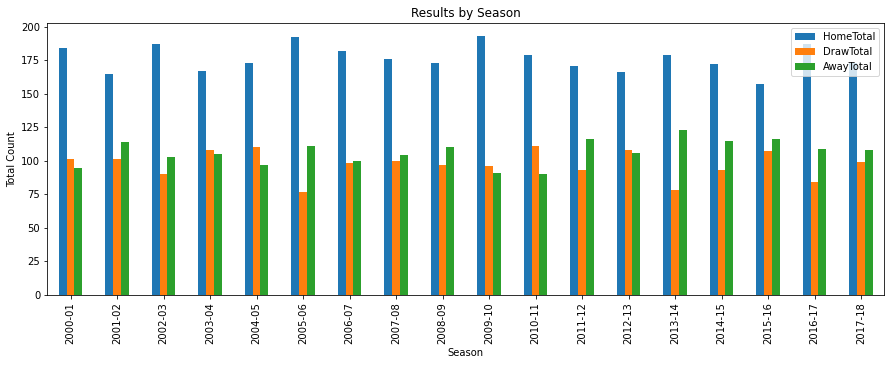

In [10]:
homeResults = results_per_season[results_per_season['FTR'] == 'H'][["Season","SumResults"]]
homeResults = homeResults.rename(columns={"SumResults": "HomeTotal"})

awayResults = results_per_season[results_per_season['FTR'] == 'A'][["Season","SumResults"]]
awayResults = awayResults.rename(columns={"SumResults": "AwayTotal"})

drawResults = results_per_season[results_per_season['FTR'] == 'D'][["Season","SumResults"]]
drawResults = drawResults.rename(columns={"SumResults": "DrawTotal"})

totalResults = pd.merge(homeResults, drawResults)
totalResults = pd.merge(totalResults, awayResults)
totalResults = totalResults.set_index('Season')
totalResults.plot(figsize = (15,5), kind = 'bar', title='Results by Season', ylabel = 'Total Count')

### Results:
#### Is there a difference in the amount of home wins and away wins in each season?

- **The result rate of matches appears to show a more favorable home win percentage.** After summing the total number of results grouped by away wins, draws, and home wins and dividing it by the total number of fixtures, the percentage of home wins was higher than away wins. Without statistical anaylsis, it can not be definitively proven that there is a higher chance of winning at home, only that there were more wins at home over the data set than there were away wins. 

- **The total amount of each result shows that there were more home wins every season than away wins.** The amount of home wins shown in the graph was noticeably higher than the number of other results each season. 

## Part 2: Can the league table for each season be created based on the results in the raw dataset?

The Premier League table includes several key statistics. The first feature is the total number of points accumulated by each team during the season. The second important feature is goal differential since it is the tie breaker for league standings if teams have equal points. The goal differential is the number of goals scored by a team during a season minus the number of goals they conceded.  

In order to create an accurate league table, the results for each game must be aggregated by team. Each result then must be assigned its points value: 3 points for a win, 1 point for a draw and 0 points for a loss. Additionally, the amount of goals scored for and against a team must be totaled in order to calculate the goal differential. 

The dataset contains the results of a each game played. These are recorded as 'H', 'A', and 'D'. 'H' indicates a  win for the home team, 'A' indicates a win for the away team, and 'D' indicates a draw. Since each game's result is recorded with these abbreviations, each team's results must be determined by the result of the game when they were the home team and when they were the away team. This also must be done to determine the amount of goals scored and conceded when at home.

The relevant features in the existing dataset to create a league table are the Full Time Home Goals (FTHG), Full Time Away Goals (FTAG), and Full Time Results (FTR). From these features I will determine the Goals Scored Against at Home (GSAH), the Goals Scored Agaist Away (GSAA), the total Goals For (GF), the total Goals Against (GA), and the Goal Differential (GD). I will also determine the Total Points (Total_points), Total Wins (Total_wins), Total Losses (Total_losses), and Total draws (Total_draws) for each team. Additionally, I will determine how many points a team earned from home wins (HWP), away wins (AWP), home draws (HDP), and away draws (ADP).

In [11]:
def goals_per_team(dataframe):
    teams = np.sort(dataframe['HomeTeam'].unique()) 
    HomeTeam = pd.DataFrame({'HomeTeam': teams}) 
    AwayTeam = pd.DataFrame({'AwayTeam': teams}) 
    
    homeTeam_goals = dataframe[["HomeTeam","FTHG"]]
    awayTeam_goals = dataframe[["AwayTeam","FTAG"]]

    homeTeam_goals_against = dataframe[["HomeTeam","FTAG"]]
    awayTeam_goals_against = dataframe[["AwayTeam","FTHG"]]
    
    home_goals = pd.merge(HomeTeam, homeTeam_goals, on='HomeTeam')
    home_goals =home_goals.groupby('HomeTeam').sum()
    
    away_goals = pd.merge(AwayTeam, awayTeam_goals, on = 'AwayTeam')
    away_goals =away_goals.groupby('AwayTeam').sum()
    
    home_goals.reset_index(inplace = True)
    away_goals.reset_index(inplace = True)
    goals_per_team = pd.merge(home_goals, away_goals, left_on = 'HomeTeam', right_on = 'AwayTeam').drop('AwayTeam', axis=1)
    
    home_goals_against = pd.merge(HomeTeam, homeTeam_goals_against, on='HomeTeam')
    home_goals_against =home_goals_against.groupby('HomeTeam').sum()
    away_goals_against = pd.merge(AwayTeam, awayTeam_goals_against, on = 'AwayTeam')
    away_goals_against =away_goals_against.groupby('AwayTeam').sum()
    
    home_goals_against.reset_index(inplace = True)
    away_goals_against.reset_index(inplace = True)
    goals_against =pd.merge(home_goals_against, away_goals_against, left_on = 'HomeTeam', right_on = 'AwayTeam').drop('AwayTeam', axis=1)
    
    
    goals_against = goals_against.rename(columns={"FTAG": "GSAH", "FTHG": "GSAA"})
    total_goals =pd.merge(goals_per_team, goals_against)
    total_goals['GF'] = total_goals['FTHG'] + total_goals['FTAG']
    total_goals['GA'] = total_goals['GSAH'] + total_goals['GSAA']
    total_goals['GD'] =  total_goals['GF']-total_goals['GA']
    return total_goals
    

In [12]:
pd.set_option('mode.chained_assignment', None)
def team_results(dataframe):
    
    teams = np.sort(dataframe['HomeTeam'].unique()) 
    HomeTeam = pd.DataFrame({'HomeTeam': teams}) 
    AwayTeam = pd.DataFrame({'AwayTeam': teams}) 

    homeTeam = dataframe[["HomeTeam","FTR"]]
    awayTeam = dataframe[["AwayTeam","FTR"]]
    

    awayDraws = awayTeam[awayTeam['FTR'] == 'D']
    awayDraws['ADP'] = 1

    awayWins = awayTeam[awayTeam['FTR'] == 'A']
    awayWins['AWP'] = 3
    
    awayLosses = awayTeam[awayTeam['FTR'] == 'H']
    awayLosses['AL'] = 1
    

    awayWins = awayWins.groupby('AwayTeam').sum()
    awayDraws = awayDraws.groupby('AwayTeam').sum()
    awayLosses = awayLosses.groupby('AwayTeam').sum()

    awayWins.reset_index(inplace = True)
    awayDraws.reset_index(inplace = True)
    away = pd.merge(AwayTeam, awayWins, how='left')
    away = pd.merge(away, awayDraws, how='left')
    away = pd.merge(away, awayLosses,how='left', left_on = 'AwayTeam', right_on = 'AwayTeam')

    homeDraws = homeTeam[homeTeam['FTR'] == 'D']
    homeDraws['HDP'] = 1

    homeWins = homeTeam[homeTeam['FTR'] == 'H']
    homeWins['HWP'] = 3
    
    homeLosses = homeTeam[homeTeam['FTR'] == 'A']
    homeLosses['HL'] = 1

    homeWins = homeWins.groupby('HomeTeam').sum()
    homeDraws = homeDraws.groupby('HomeTeam').sum()
    homeLosses = homeLosses.groupby('HomeTeam').sum()

    homeWins.reset_index(inplace = True)
    homeDraws.reset_index(inplace = True)
    home = pd.merge(HomeTeam, homeWins,how='left')
    home = pd.merge(home, homeDraws, how='left')
    home = pd.merge(home, homeLosses, how='left' , left_on = 'HomeTeam', right_on = 'HomeTeam')
    
    

    total =pd.merge(home, away, left_on = 'HomeTeam', right_on = 'AwayTeam').drop('AwayTeam', axis=1)
    total = total.fillna(0)
    
    total["Total_points"] = total['HWP'] + total['AWP'] + total['HDP'] + total['ADP']
    total["Total_wins"] = (total['HWP'] + total['AWP']) // 3
    total["Total_draws"] = total['HDP'] + total['ADP'] 
    total['Total_losses'] = total['HL'] + total['AL'] 
    
    total =total.sort_values(by=['Total_points'], ascending=False)
    
    
    goals_year = goals_per_team(dataframe)
    merged = pd.merge(total, goals_year)

    merged =merged.sort_values(by=['Total_points', 'GD'], ascending=False)
    merged = merged.rename(columns={"HomeTeam": "Team"}) 

    return merged

### Results:
#### Can the league table for each season be created based on the results in the raw dataset?

- **Yes, the league table for each season can be created based on the features provided in the raw dataset.**

- **The results of my calculations can be verified from the league tables of the season from the Premier League dataset.**
    - Premier League Table for the 2000-2001 Season: https://www.premierleague.com/tables?co=1&se=9&ha=-1
    - In the 2000-2001 season Manchester United did win the league with 80 points, 24 wins, 8 draws, and 6 losses. 

In [13]:
team_results(raw_2000).head()

,Team,HWP,HDP,HL,AWP,ADP,AL,Total_points,Total_wins,Total_draws,Total_losses,FTHG,FTAG,GSAH,GSAA,GF,GA,GD
0,Man United,45,2,2,27,6,4,80,24,8,6,49,30,12,19,79,31,48
1,Arsenal,45,3,1,15,7,7,70,20,10,8,45,18,13,25,63,38,25
2,Liverpool,39,4,2,21,5,7,69,20,9,9,40,31,14,25,71,39,32
3,Leeds,33,3,5,27,5,5,68,20,8,10,36,28,21,22,64,43,21
4,Ipswich,33,5,3,27,1,9,66,20,6,12,31,26,15,27,57,42,15


## Part 3: Which team accumulated the most points over the seasons? 

Since in part 2 I was able to create the league table based on a dataframe, I can then apply the functions I created onto the entire dataset with every season using groupby and apply. 

Then using that new dataframe I can determine which team earned the most points over all of the seasons by grouping the data by team and summing the Total_points category. Then, using a pivot table I can look at the amount of points accumulated by each team each season.

In [14]:
seasons_leagueTable = seasons_data.groupby('Season').apply(team_results)
seasons_leagueTable.reset_index(level = 0, inplace = True)
totalPoints_perteam = seasons_leagueTable.groupby('Team')['Total_points'].sum().to_frame()

#### Plot of total points per team

<AxesSubplot:title={'center':'Total Points Accumulated by Team'}, xlabel='Team', ylabel='Number of Points'>

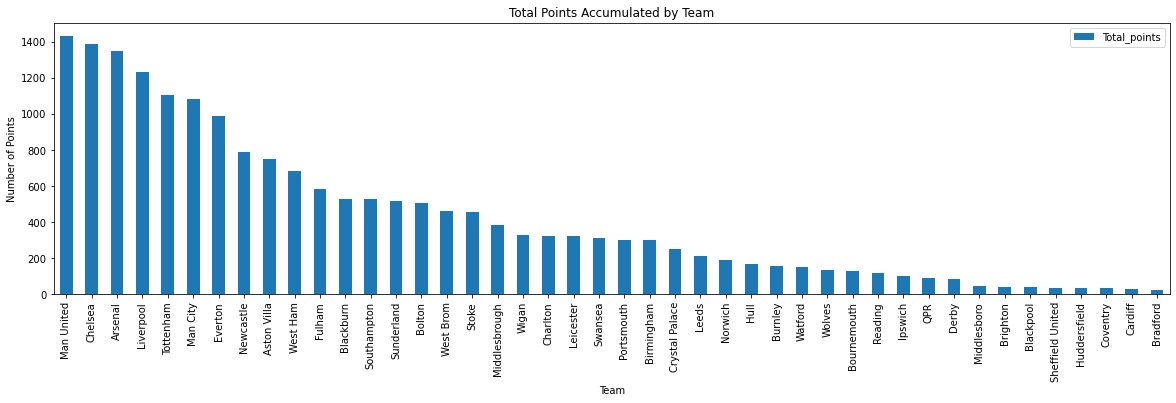

In [15]:
totalPoints_perteam.sort_values(by=['Total_points'], ascending=False, inplace = True)
totalPoints_perteam.plot.bar(figsize = (20, 5), use_index = True, title='Total Points Accumulated by Team', ylabel = 'Number of Points')

In [16]:
pivot_table = pd.pivot_table(seasons_leagueTable, values = 'Total_points', index = 'Season',columns = 'Team')

#### Plot of the total points per season for 10 selected teams

<AxesSubplot:title={'center':'West Ham: Points Earned by Season'}, xlabel='Season'>

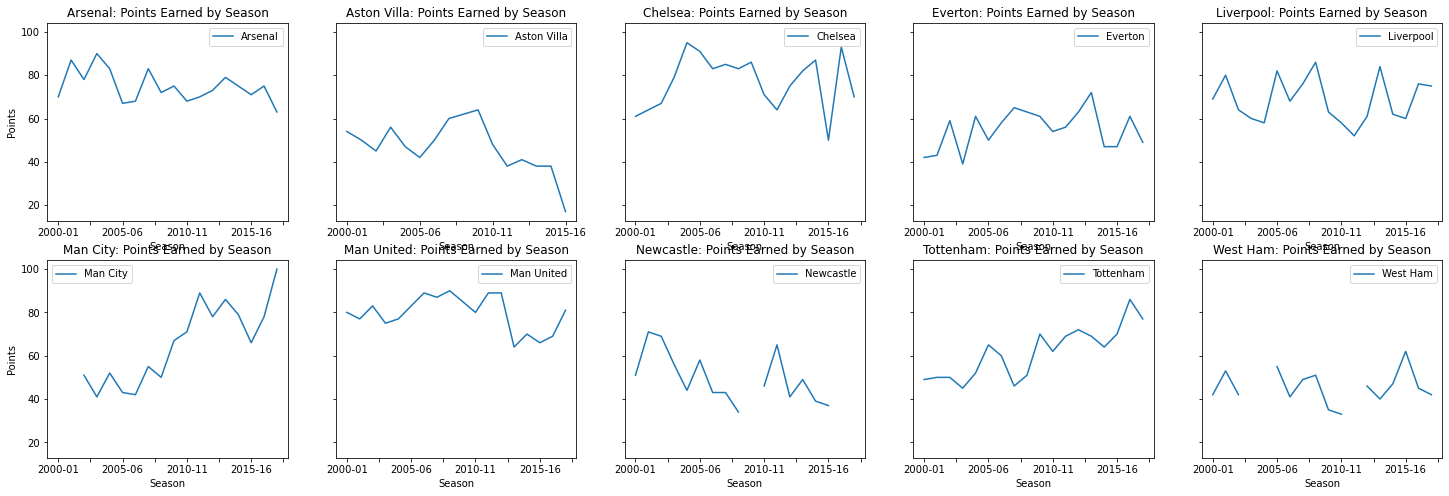

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (25, 8), sharey=True)
pivot_table.loc[:, 'Arsenal'].plot(ax = axes[0,0], legend = True, label = 'Arsenal', title='Arsenal: Points Earned by Season', ylabel = 'Points')
pivot_table.loc[:, 'Aston Villa'].plot(ax = axes[0, 1],legend = True, label = 'Aston Villa', title='Aston Villa: Points Earned by Season')
pivot_table.loc[:, 'Chelsea'].plot(ax = axes[0, 2], legend = True, label = 'Chelsea', title='Chelsea: Points Earned by Season')
pivot_table.loc[:, 'Everton'].plot(ax = axes[0, 3], legend = True, label = 'Everton', title='Everton: Points Earned by Season')
pivot_table.loc[:, 'Liverpool'].plot(ax = axes[0, 4], legend = True,label = 'Liverpool', title='Liverpool: Points Earned by Season')

pivot_table.loc[:, 'Man City'].plot(ax = axes[1, 0], legend = True,label = 'Man City', title='Man City: Points Earned by Season', ylabel = 'Points')
pivot_table.loc[:, 'Man United'].plot(ax = axes[1, 1],legend = True, label = 'Man United', title='Man United: Points Earned by Season')
pivot_table.loc[:, 'Newcastle'].plot(ax = axes[1, 2], legend = True,label = 'Newcastle', title='Newcastle: Points Earned by Season')
pivot_table.loc[:, 'Tottenham'].plot(ax = axes[1, 3], legend = True,label = 'Tottenham', title='Tottenham: Points Earned by Season')
pivot_table.loc[:, 'West Ham'].plot(ax = axes[1, 4], legend = True,label = 'West Ham', title='West Ham: Points Earned by Season')

### Results:
#### Which team accumulated the most points over the seasons? 

- **After summing up all of the points for each team and graphing it, it shows that Manchester United earned the most points over the years.** Although they earned the most points, it can not be concluded that they did the best in terms of results over the years since the total points might not be evenly distributed each year.

- **Although certain teams have the most amount of points throughout the duration of the dataset, this does not mean that have been consistently the best team.** The Premier League has a group of teams called the "Big Six". These are the most well known teams and usually finish in the top 6 of the league standings. Looking at the total points accumulated by these six teams and an additional four teams, you can see that the total points in the earlier graph do not tell the whole story about a team's results. For instance, Man City has been on an upward trend in recent years while Arsenal has been on a downward trend. Additionally, Newcastle and West Ham both were relegated at times which can be seen in the missing sections of the line graphs. 

## Part 4: Does the cutoff for being in the top four and bottom four change each year? 

The top four teams in the Premier League qualify for European Championship football while the bottom four teams are relegated into a lower league. First I will plot the highest and the lowest amount of points each season to see what it takes to win the league and what the lowest points are in the table. I will then look at the minimum point value of the top four to determine the cutoff for being in the top four. I will also look at the maximum point value of the bottom four to see the cutoff for how many points are needed to stay in the table.

#### Plot of the cutoff for the top and bottom four positions in the league table. 

<AxesSubplot:title={'center':'Top and Bottom Cutoff of the League'}, xlabel='Season'>

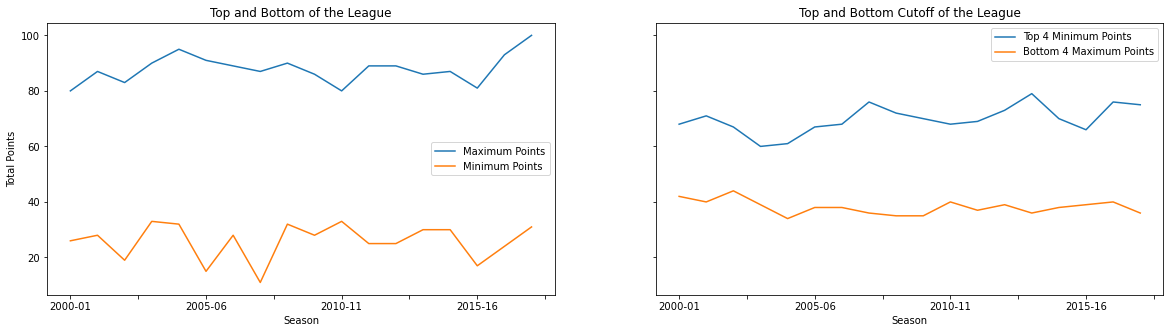

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5), sharey=True)

seasons_leagueTable.groupby('Season')['Total_points'].max().plot(ax = ax1, ylabel = 'Total Points', legend = True, label = 'Maximum Points', title = 'Top and Bottom of the League')
seasons_leagueTable.groupby('Season')['Total_points'].min().plot(ax = ax1, legend = True, label ='Minimum Points')

top_four = seasons_leagueTable.groupby('Season')['Total_points'].nlargest(4).to_frame()
top_four.groupby('Season')['Total_points'].min().plot(ax = ax2, legend = True, label = 'Top 4 Minimum Points', title = 'Top and Bottom Cutoff of the League')

bottom_four = seasons_leagueTable.groupby('Season')['Total_points'].nsmallest(4).to_frame()
bottom_four.groupby('Season')['Total_points'].max().plot(ax = ax2, legend = True, label = 'Bottom 4 Maximum Points')

In [24]:
print("Average top four cutoff: " +str(top_four.groupby('Season')['Total_points'].min().mean()))
print("Average bottom four cutoff: " + str(bottom_four.groupby('Season')['Total_points'].max().mean()))

Average top four cutoff: 69.77777777777777
Average bottom four cutoff: 38.111111111111114


### Results: 
#### Does the cutoff for being in the top four and bottom four change each year? 

- **It appears that the cutoff for being in top four and in the bottom four shifts each year.** The average cutoff for the top four is 69.7 points and the average bottom four cutoff is 38.1 points. Looking at the graphs though, this cutoff seems to flucuate despite what the average cutoff value indicates.

## Additional Visualizations: Correlation Between Features
As an additional way to investigate the relationship between features in the league table I plotted a heatmap and scatter matrix. Althouth unncessary for looking at this dataset, it was interesting to see how certain features are related to each other. 

#### Heatmap of the correlation for the features of the league table for all of the seasons

<AxesSubplot:>

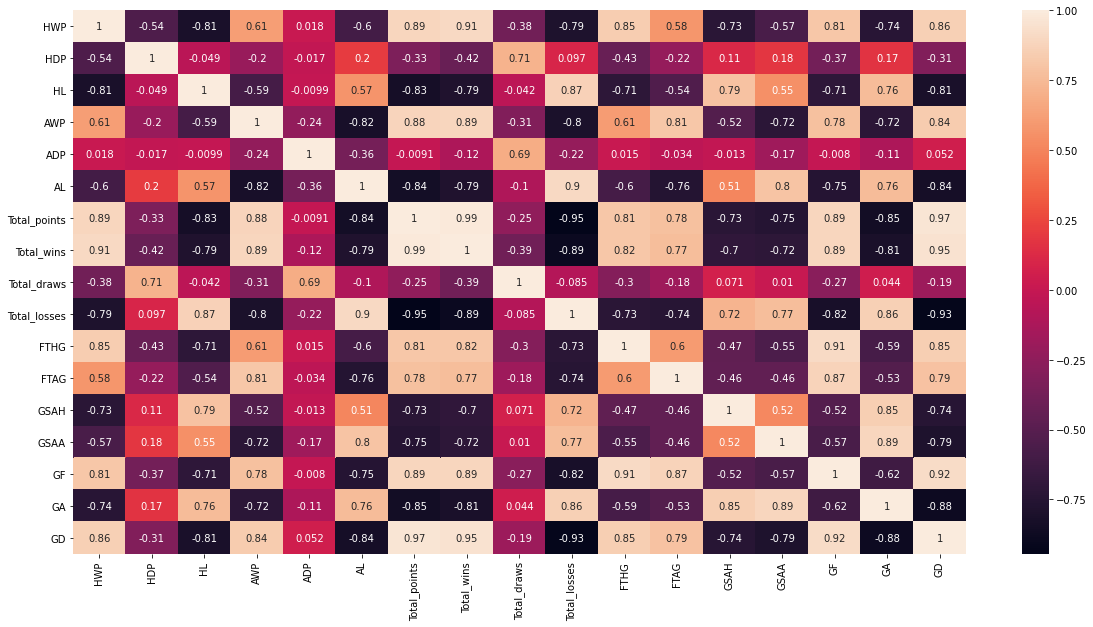

In [20]:
plt.figure(figsize=(20,10)) 
sns.heatmap(seasons_leagueTable.corr(), annot= True)

#### Scatter matrix for selected features of the league table for all of the seasons

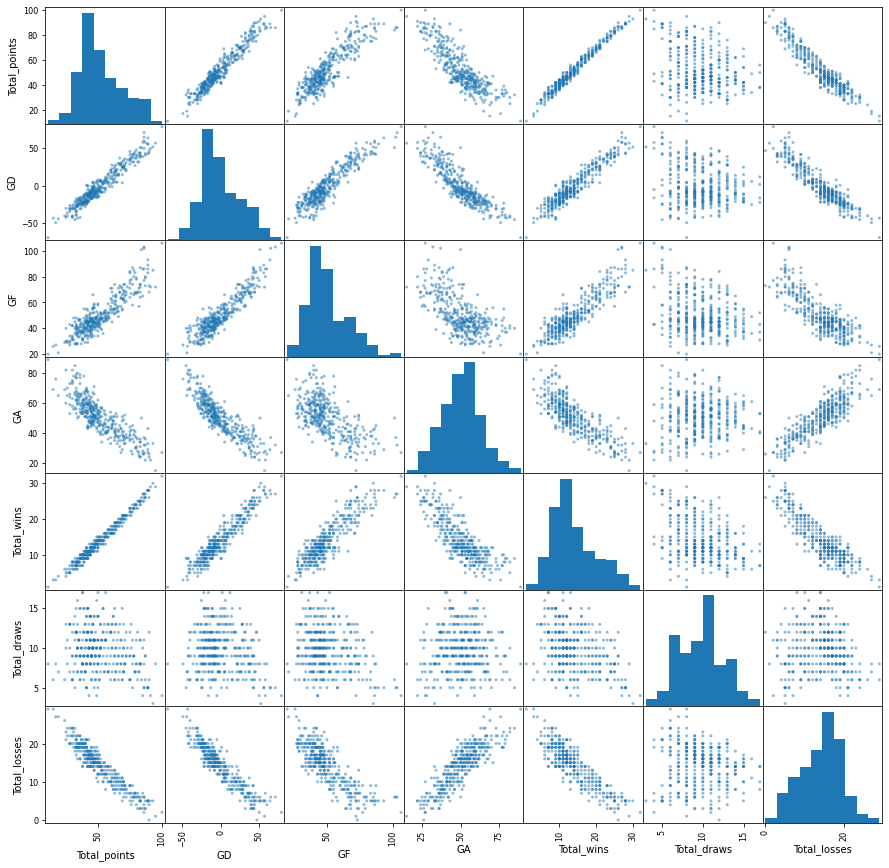

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(seasons_leagueTable[['Total_points','GD','GF','GA', 'Total_wins','Total_draws','Total_losses']], figsize=(15,15))
plt.show()

### Results:
- While this section used some additional packages and features, I thought it was interesting to look at the table I created from the data as a way to verify that the data appears reasonable. For instance it makes sense looking at the scatter matrix that total_losses and total_points are negatively associated with each other. Likewise, it makes sense that goal differential and full time home goals are postively correlated. 

## Conclusion

After working with the Premier League dataset, it can be observed that there are more home goals scored and more home wins in each season. It also can be seen that there are more goals scored in the second half of a game than in the first half of a game. It was also discovered that the league table can be created from the Kaggle Dataset. Also from that data it was found that Manchester United earned the most points from 2000-2018. Additionally, the cutoff for the top 4 and bottom 4 was determined for each season with an average top four cutoff of 38.1 and an average bottom four cutoff of 69.7. Lastly, using a heatmap and scatter matrix it was shown that certain features appeared to have a correlation.  

### Future Questions of Inquiry 
Although, I was able to answer the questions I posed when working with the data set, new questions arose as I experimented and worked with the data. Consquently, some future queries of interest include:
- Does the home team advantage still exist after the COVID-19 pandemic which forced teams to play behind closed doors without any fans attending?

- Could the features such as home shots, away shots, etc. be analyzed more comprehensively to determine if a game would result in a win, loss or draw?

- Could the cutoff for relegation and European soccer be predicted based on the features and averages found from the original dataset and the curated dataset? 